In [5]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

In [6]:
#input and output

quality = ctrl.Antecedent(np.arange(0,11,1),'quality')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(0,26,1),'tip')

In [7]:
#automf

quality.automf(3)
service.automf(3)

In [8]:
#set tip range

tip['low'] = fuzz.trimf(tip.universe,[0,0,13])
tip['medium'] = fuzz.trimf(tip.universe,[0,13,25])
tip['high'] = fuzz.trimf(tip.universe,[13,25,25])

19.847607361963192


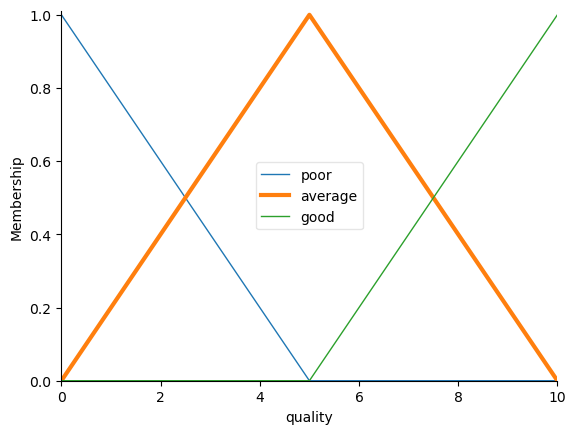

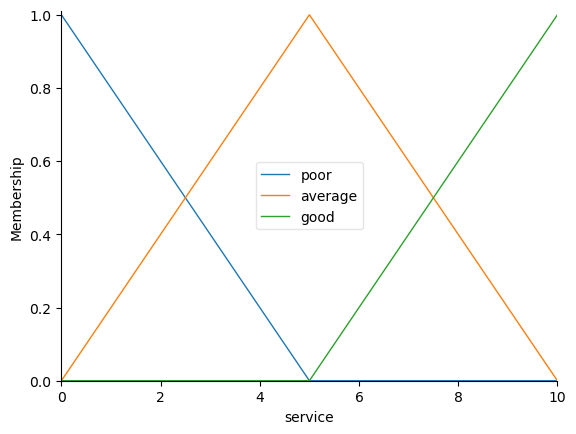

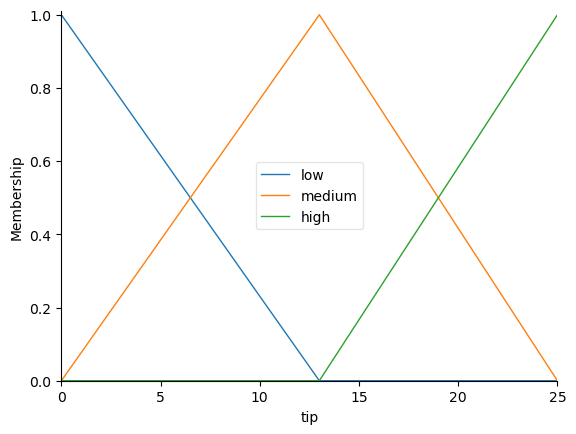

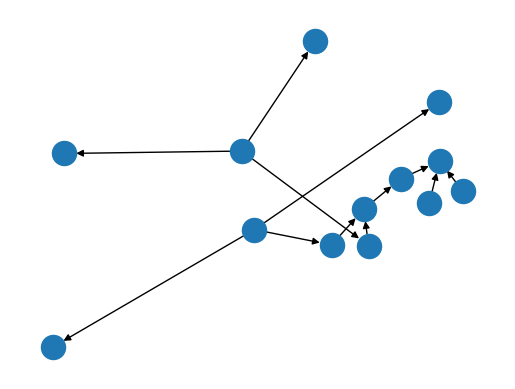

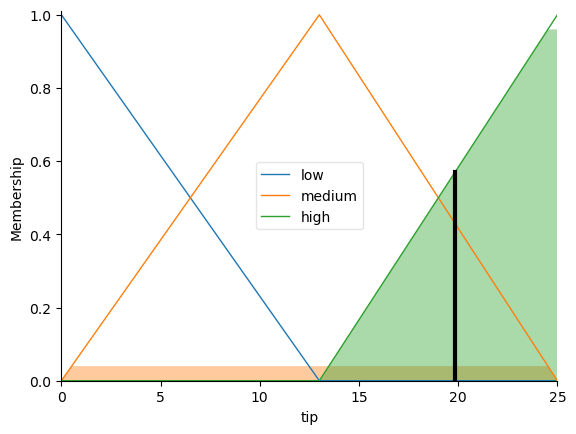

In [11]:
#view
quality['average'].view()
service.view()
tip.view()


rule1 = ctrl.Rule(quality['poor'] | service['poor'],tip['low'])
rule2 = ctrl.Rule(service['average'],tip['medium'])
rule3 = ctrl.Rule(quality['good'] | service['good'],tip['high'])
rule1.view()

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['quality'] = 6.7
tipping.input['service'] = 9.8

tipping.compute()
print( tipping.output['tip'])
tip.view(sim=tipping)